<a href="https://colab.research.google.com/github/agushery/DataVisualization-COVID19/blob/master/Data_Visualization_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization Covid-19**
* **Nama : Agus Hery Setiawan**
* **Data Source-COVID-19 : https://github.com/CSSEGISandData**
* **Data Source Population : https://www.worldpopulationreview.com**

## **Prepare library and Load Dataset**

### **Import Library**

In [1]:
# for load dataset
import pandas as pd

# for processing quartil
import numpy as np


# for visual
import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = 20,8
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
plt.rcParams['figure.figsize'] = 20,8
import cufflinks as cf
cf.go_offline()

import seaborn as sns
sns.set_style('whitegrid')

print('Setup Complete')


Setup Complete


### **Load Dataset Covid from source**

In [2]:
# save url to variabel
url_confirm = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovery = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# load dataset with pandas
confirm_data = pd.read_csv(url_confirm)
death_data = pd.read_csv(url_death)
recovery_data = pd.read_csv(url_recovery)

print('Load Dataset Complete')

Load Dataset Complete


### **Load Dataset Population**

In [3]:
population_data = pd.read_csv('Data/population-2020.csv')
print('Load Dataset Complete')

Load Dataset Complete


### **Check Shape and Info of Dataset**

SHAPE

In [4]:
print('confirm_data : ', confirm_data.info())
print('death_data : ', death_data.info())
print('recovery_data : ', recovery_data.info())
print('population_data : ', population_data.info())

confirm_data :  (276, 506)
death_data :  (276, 506)
recovery_data :  (261, 506)
Population_data :  (232, 4)


INFO

In [5]:
print('confirm_data : ', confirm_data.info())
print('death_data : ', death_data.info())
print('recovery_data : ', recovery_data.info())
print('population_data : ', population_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 506 entries, Province/State to 6/6/21
dtypes: float64(2), int64(502), object(2)
memory usage: 1.1+ MB
confirm_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 506 entries, Province/State to 6/6/21
dtypes: float64(2), int64(502), object(2)
memory usage: 1.1+ MB
death_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 506 entries, Province/State to 6/6/21
dtypes: float64(2), int64(502), object(2)
memory usage: 1.0+ MB
recovery_data :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cca2     231 non-null    object
 1   name     232 non-null    object
 2   pop2020  232 non-null    int64 
 3   rank     232 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.4+ KB
population_da

## **Preprocessing Data**

### **Melt Data**

In [6]:
# Confirmed
confirm_data = confirm_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Confirmed'
)

# Death
death_data = death_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Deaths'
)

# Recovery
recovery_data = recovery_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Time',
    value_name='Recovered'
)

### **Grouped Dataset COVID-19**

In [7]:
# Confirmed Data
confirm_data = confirm_data.groupby(['Country/Region', 'Time'])['Confirmed'].sum()
confirm_data = confirm_data.to_frame().reset_index()

# Deaths Data
death_data = death_data.groupby(['Country/Region', 'Time'])['Deaths'].sum()
death_data = death_data.to_frame().reset_index()

# Recovery Data
recovery_data = recovery_data.groupby(['Country/Region', 'Time'])['Recovered'].sum()
recovery_data = recovery_data.to_frame().reset_index()

**MERGE DATASET COVID-19**

In [8]:
data = confirm_data.merge(death_data, how='inner')
data = data.merge(recovery_data, how='inner')

**Add Active Column**

In [9]:
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1/1/21,51526,2191,41727,7608
1,Afghanistan,1/10/21,53489,2277,43948,7264
2,Afghanistan,1/11/21,53538,2288,44137,7113
3,Afghanistan,1/12/21,53584,2301,44608,6675
4,Afghanistan,1/13/21,53584,2301,44850,6433


**Initiation last day of data**

In [10]:
data['Time'] = pd.to_datetime(data['Time'])
recent_date = data['Time'].max()
last_day = data[data['Time'] == recent_date]
last_day.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active
406,Afghanistan,2021-06-06,79224,3145,58622,17457
908,Albania,2021-06-06,132379,2451,129664,264
1410,Algeria,2021-06-06,130958,3518,91198,36242
1912,Andorra,2021-06-06,13758,127,13527,104
2414,Angola,2021-06-06,35772,797,28880,6095


**Grouped Time Column**

In [11]:
# group data by time

dataGroup = data.groupby('Time')[["Confirmed","Deaths","Recovered","Active"]].sum()
dataGroup.head()

,Confirmed,Deaths,Recovered,Active
Time,,,,
2020-01-22,557,17,30,510
2020-01-23,655,18,32,605
2020-01-24,941,26,39,876
2020-01-25,1433,42,42,1349
2020-01-26,2118,56,56,2006


**Rename Columns and Pick Columns Coutry/Region, Population of Population dataset**

In [12]:
population_data.rename(columns={'name' : 'Country/Region', 'pop2020' : 'Population'}, inplace = True)
population_data = population_data[['Country/Region','Population']]

**MERGE DATA Last Day With Population**

In [13]:
final_data = pd.merge(last_day, population_data)
final_data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,2021-06-06,79224,3145,58622,17457,38928346
1,Albania,2021-06-06,132379,2451,129664,264,2877797
2,Algeria,2021-06-06,130958,3518,91198,36242,43851044
3,Andorra,2021-06-06,13758,127,13527,104,77265
4,Angola,2021-06-06,35772,797,28880,6095,32866272


**Check Missing Values**

In [14]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(final_data)

,Total,Percent
Country/Region,0,0.0
Time,0,0.0
Confirmed,0,0.0
Deaths,0,0.0
Recovered,0,0.0
Active,0,0.0
Population,0,0.0


**Comparison of the number of deaths and active cases to the population of each country**

In [15]:
final_data['%Confirmed'] = final_data['Confirmed'].div(final_data['Population'])
final_data['%Deaths'] = final_data['Deaths'].div(final_data['Population'])
final_data['%Active'] = final_data['Active'].div(final_data['Population'])
final_data.head()

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
0,Afghanistan,2021-06-06,79224,3145,58622,17457,38928346,0.002035,0.000081,0.000448
1,Albania,2021-06-06,132379,2451,129664,264,2877797,0.046000,0.000852,0.000092
2,Algeria,2021-06-06,130958,3518,91198,36242,43851044,0.002986,0.000080,0.000826
3,Andorra,2021-06-06,13758,127,13527,104,77265,0.178063,0.001644,0.001346
4,Angola,2021-06-06,35772,797,28880,6095,32866272,0.001088,0.000024,0.000185


**Create Quartil**

In [16]:
q1_confirmed = np.quantile(final_data['%Confirmed'],0.25)
q2_confirmed = np.quantile(final_data['%Confirmed'],0.50)
q1_deaths = np.quantile(final_data['%Deaths'],0.25)
q2_deaths = np.quantile(final_data['%Deaths'],0.50)
q1_active = np.quantile(final_data['%Active'],0.25)
q2_active = np.quantile(final_data['%Active'],0.50)

### **Category Country by Quartil**

In [17]:
cukupRawan = final_data[(final_data['%Deaths'] <= q1_deaths) | (final_data['%Active'] <= q1_active)]
rawan = final_data[(((final_data['%Deaths'] > q1_deaths) & (final_data['%Deaths'] <= q2_deaths)) & ((final_data['Active'] > q1_active) & (final_data['%Active'] <= q2_active)))]
sangatRawan = final_data[(final_data['%Deaths'] > q2_deaths) | (final_data['%Active'] > q2_active)]

## **VISUALIZATION DATA**

### **Trend Confirmed Cases**

In [18]:
dataGroup.iplot(kind = "bar", y = "Confirmed", title = "Trend Confirm Cases Global",xTitle = "Time", yTitle = 'Confimred Cases')

### **Trend Death Cases**

In [19]:
dataGroup.iplot(kind = "bar", y = "Deaths", title = "Trend Death Cases Global",xTitle = "Time", yTitle = 'Death Cases')

### **Trend Active Cases**

In [20]:
dataGroup.iplot(kind = "bar", y = "Active", title = "Tren Active Cases Global",xTitle = "Time", yTitle = 'Active Cases')

### **Trend Recovery Cases**

In [21]:
dataGroup.iplot(kind = "bar", y = "Recovered", title = "Tren Recovery Cases Global",xTitle = "Time", yTitle = 'Recovery Cases')

### **Comparison Trend Confirmed, Deaths, Recovered, and Active Case**

In [22]:
dataGroup.iplot(title = "Trend COVID-19 Cases Global", xTitle = "Time", yTitle = "Amount")

### **Bar plot Top 10 Case**

In [23]:
df_countries_case = final_data.copy()
df_countries_case.index = df_countries_case["Country/Region"]
df_countries_case = df_countries_case.drop(['Country/Region'],axis=1)

In [24]:
def topcase(tipe, warna):
    plt.axes(axisbelow=True)
    plt.barh(
        df_countries_case.sort_values(tipe)[tipe].index[-10:],
        df_countries_case.sort_values(tipe)[tipe].values[-10:],
        color=warna)
    plt.tick_params(size=5,labelsize = 13)
    plt.xlabel(tipe + " Cases",fontsize=18)
    plt.title("Top 10 Countries ( " + tipe +" Cases)",fontsize=20)

    plt.grid(alpha=0.3)
    plt.show()

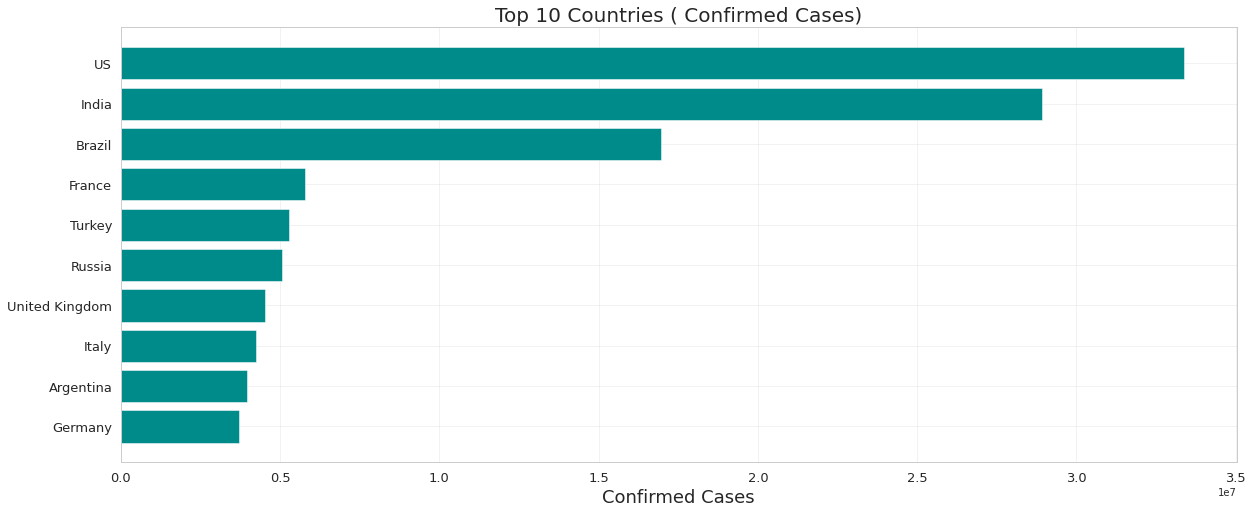

In [25]:
topcase('Confirmed','darkcyan')

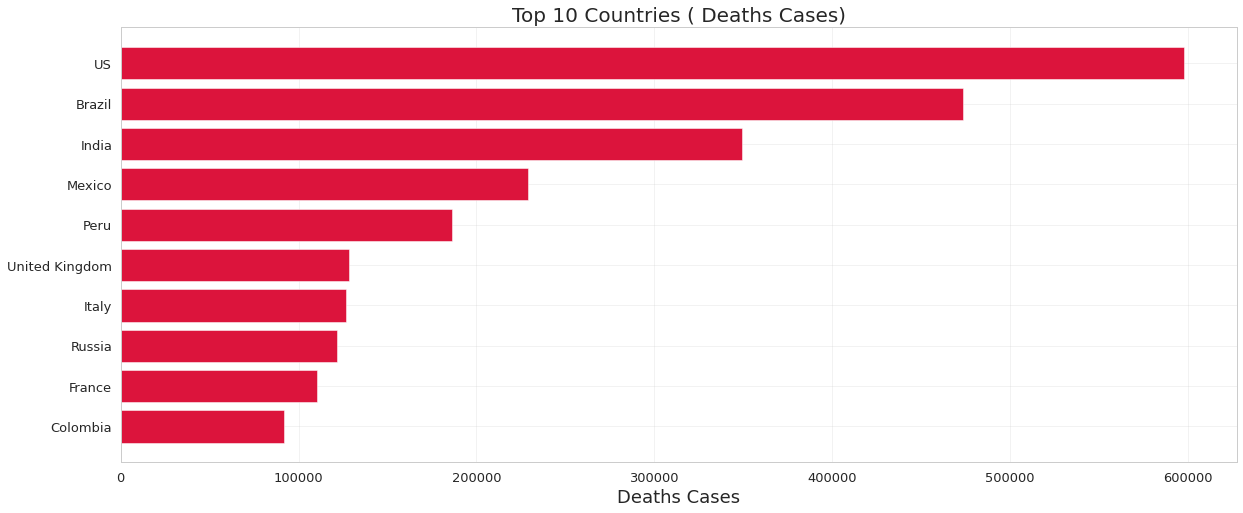

In [26]:
topcase('Deaths', 'crimson')

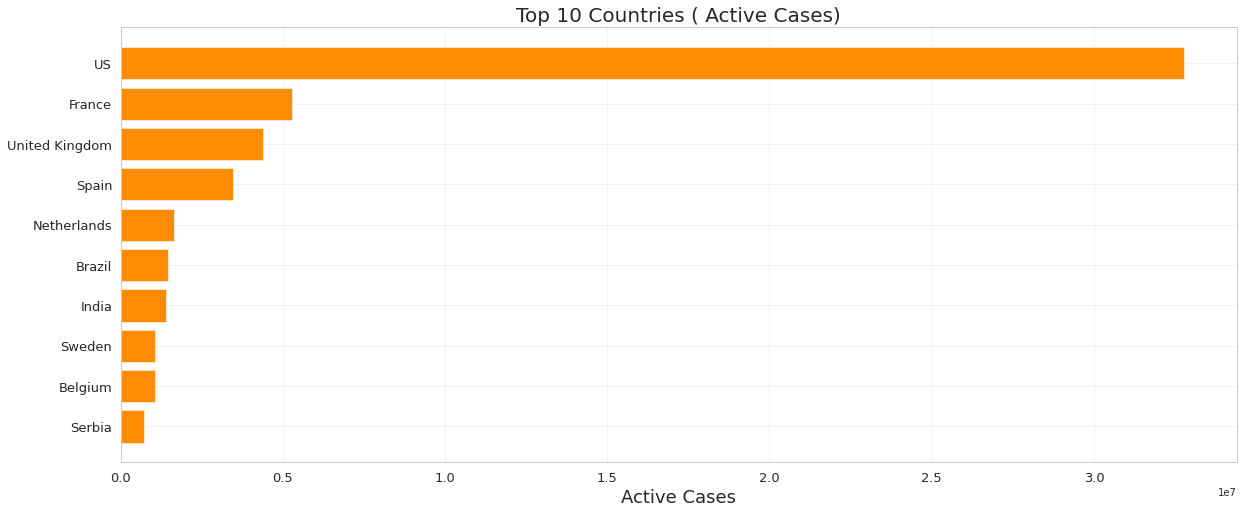

In [27]:
topcase('Active', 'darkorange')

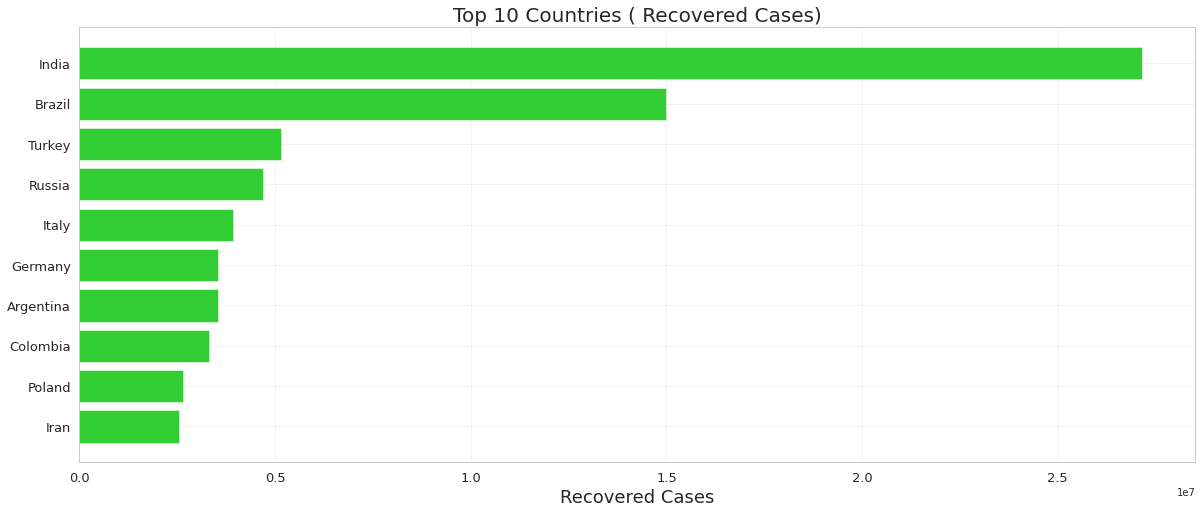

In [28]:
topcase('Recovered', 'limegreen')

### **Pie Plot Top 10 Cases**

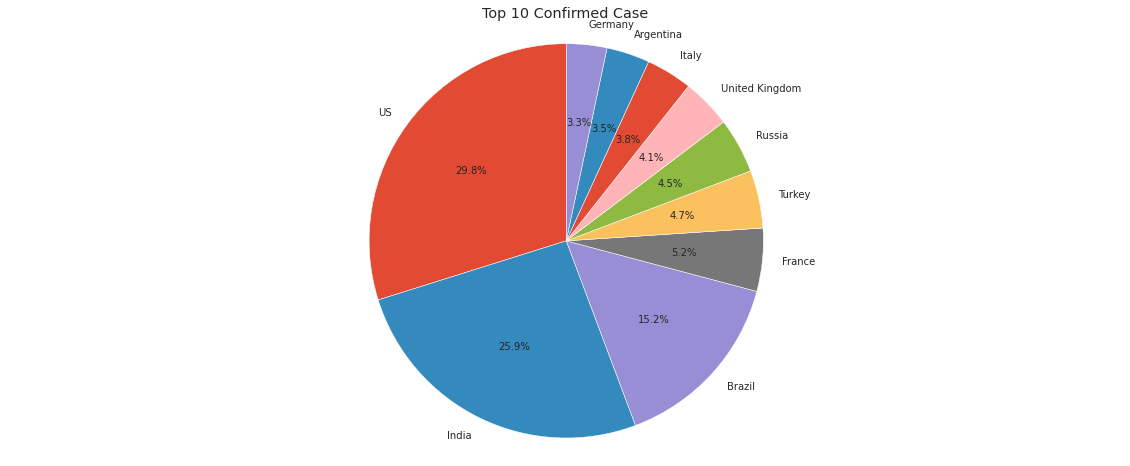

In [29]:
sortConfirmed= final_data.nlargest(10, "Confirmed")
sortConfirmed.sort_values(by = "Confirmed", ascending = False, inplace = True)
fig1, ax1 = plt.subplots()
ax1.pie(
    sortConfirmed['Confirmed'],
    labels=sortConfirmed['Country/Region'],
    autopct='%1.1f%%',
    startangle=90)
ax1.axis('equal')
plt.title('Top 10 Confirmed Case')
plt.show()

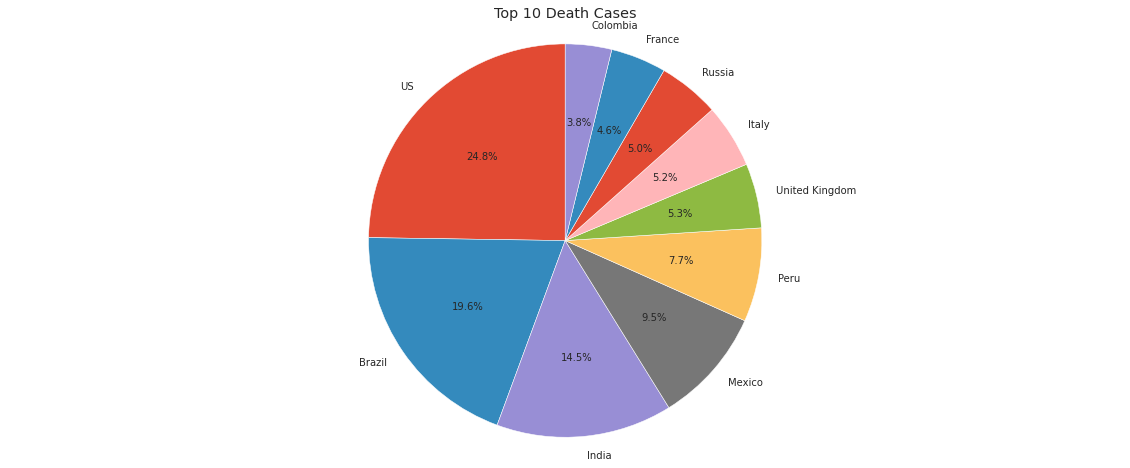

In [30]:
sortDeaths= final_data.nlargest(10, "Deaths")
sortDeaths.sort_values(by = "Deaths", ascending = False, inplace = True)
fig1, ax1 = plt.subplots()
ax1.pie(
    sortDeaths['Deaths'],
    labels=sortDeaths['Country/Region'],
    autopct='%1.1f%%',
    startangle=90)
ax1.axis('equal')
plt.title('Top 10 Death Cases')
plt.show()

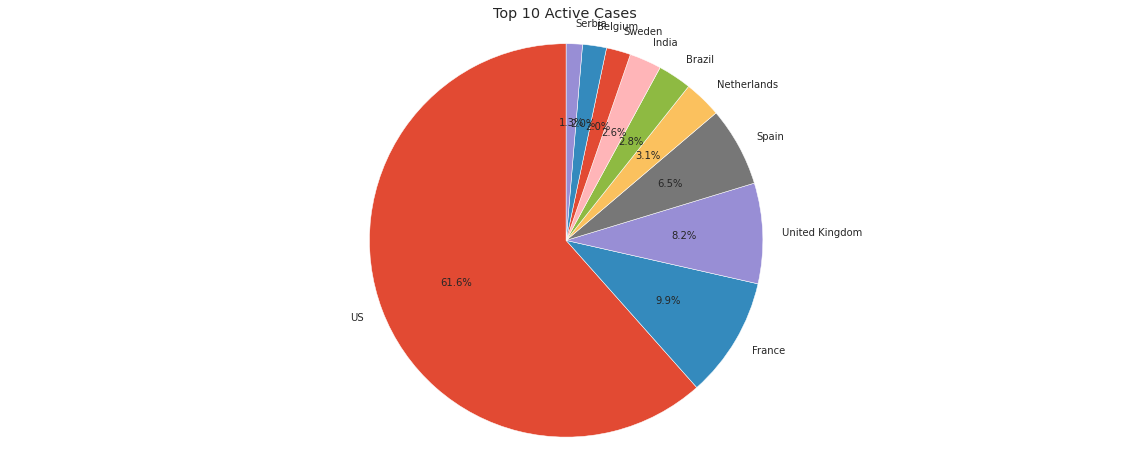

In [31]:
sortActive= final_data.nlargest(10, "Active")
sortActive.sort_values(by = "Active", ascending = False, inplace = True)
fig1, ax1 = plt.subplots()
ax1.pie(
    sortActive['Active'],
    labels=sortActive['Country/Region'],
    autopct='%1.1f%%',
    startangle=90)
ax1.axis('equal')
plt.title('Top 10 Active Cases')
plt.show()

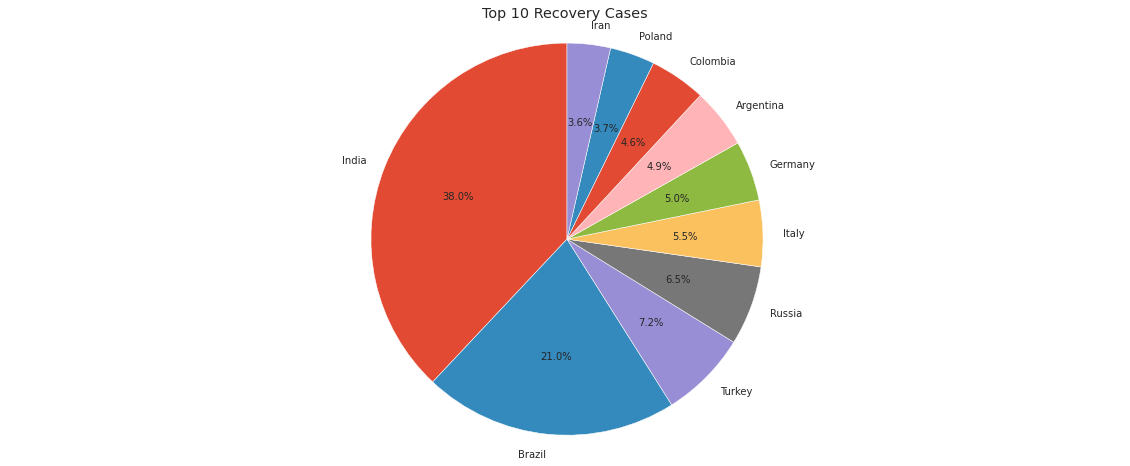

In [32]:
sortRecovered= final_data.nlargest(10, "Recovered")
sortRecovered.sort_values(by = "Recovered", ascending = False, inplace = True)
fig1, ax1 = plt.subplots()
ax1.pie(
    sortRecovered['Recovered'],
    labels=sortRecovered['Country/Region'],
    autopct='%1.1f%%',
    startangle=90)
ax1.axis('equal')
plt.title('Top 10 Recovery Cases')
plt.show()

### **Maping Categories Country**

**function for maping**

In [33]:
def maping(data_map, location, color, hover_name, title, colbar):
    fig = px.choropleth(data_map, locations=location,
                    color=color,locationmode='country names', 
                    hover_name=hover_name, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
    fig.update_layout(title_text=title)
    fig.update_coloraxes(colorbar_title=colbar)
    fig.show()

**Quite Vulnerable**

In [34]:
maping(final_data, cukupRawan['Country/Region'], cukupRawan['Confirmed'], cukupRawan['Country/Region'], 'Quite Vulnerable', 'Number of Confirmed')

In [35]:
cukupRawan.style.background_gradient(cmap = "Reds")

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
4,Angola,2021-06-06 00:00:00,35772,797,28880,6095,32866272,0.001088,0.000024,0.000185
5,Antigua and Barbuda,2021-06-06 00:00:00,1263,42,1214,7,97929,0.012897,0.000429,0.000071
18,Benin,2021-06-06 00:00:00,8082,102,7893,87,12123200,0.000667,0.000008,0.000007
19,Bhutan,2021-06-06 00:00:00,1687,1,1388,298,771608,0.002186,0.000001,0.000386
24,Brunei,2021-06-06 00:00:00,244,3,231,10,437479,0.000558,0.000007,0.000023
26,Burkina Faso,2021-06-06 00:00:00,13453,167,13265,21,20903273,0.000644,0.000008,0.000001
28,Burundi,2021-06-06 00:00:00,4905,8,773,4124,11890784,0.000413,0.000001,0.000347
29,Cambodia,2021-06-06 00:00:00,34244,263,27147,6834,16718965,0.002048,0.000016,0.000409
32,Central African Republic,2021-06-06 00:00:00,7091,98,6859,134,4829767,0.001468,0.000020,0.000028
33,Chad,2021-06-06 00:00:00,4939,174,4757,8,16425864,0.000301,0.000011,0.000000


**Vulnerable Country**

In [36]:
maping(final_data, rawan['Country/Region'], rawan['Confirmed'], rawan['Country/Region'], 'Vulnerable Country', 'Number of Confirmed')

In [37]:
rawan.style.background_gradient(cmap = "Reds")

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
0,Afghanistan,2021-06-06 00:00:00,79224,3145,58622,17457,38928346,0.002035,0.000081,0.000448
8,Australia,2021-06-06 00:00:00,30191,910,23607,5674,25499884,0.001184,0.000036,0.000223
13,Bangladesh,2021-06-06 00:00:00,810990,12839,751322,46829,164689383,0.004924,0.000078,0.000284
14,Barbados,2021-06-06 00:00:00,4031,47,3922,62,287375,0.014027,0.000164,0.000216
27,Burma,2021-06-06 00:00:00,144317,3225,132452,8640,54409800,0.002652,0.000059,0.000159
37,Comoros,2021-06-06 00:00:00,3888,146,3736,6,869601,0.004471,0.000168,0.000007
42,Cuba,2021-06-06 00:00:00,148918,1012,141949,5957,11326616,0.013148,0.000089,0.000526
45,Djibouti,2021-06-06 00:00:00,11562,154,11385,23,988000,0.011702,0.000156,0.000023
51,Equatorial Guinea,2021-06-06 00:00:00,8626,118,8203,305,1402985,0.006148,0.000084,0.000217
55,Ethiopia,2021-06-06 00:00:00,272914,4209,246247,22458,114963588,0.002374,0.000037,0.000195


**Very Vulnerable Country**

In [38]:
maping(final_data, sangatRawan['Country/Region'], sangatRawan['Confirmed'], sangatRawan['Country/Region'], 'Very Vulnerable Country', 'Number of Confirmed')

In [39]:
sangatRawan.style.background_gradient(cmap = "Reds")

,Country/Region,Time,Confirmed,Deaths,Recovered,Active,Population,%Confirmed,%Deaths,%Active
1,Albania,2021-06-06 00:00:00,132379,2451,129664,264,2877797,0.046000,0.000852,0.000092
2,Algeria,2021-06-06 00:00:00,130958,3518,91198,36242,43851044,0.002986,0.000080,0.000826
3,Andorra,2021-06-06 00:00:00,13758,127,13527,104,77265,0.178063,0.001644,0.001346
5,Antigua and Barbuda,2021-06-06 00:00:00,1263,42,1214,7,97929,0.012897,0.000429,0.000071
6,Argentina,2021-06-06 00:00:00,3955439,81214,3529033,345192,45195774,0.087518,0.001797,0.007638
7,Armenia,2021-06-06 00:00:00,223180,4458,214363,4359,2963243,0.075316,0.001504,0.001471
9,Austria,2021-06-06 00:00:00,646800,10639,630942,5219,9006398,0.071816,0.001181,0.000579
10,Azerbaijan,2021-06-06 00:00:00,334715,4941,326893,2881,10139177,0.033012,0.000487,0.000284
11,Bahamas,2021-06-06 00:00:00,11930,232,10932,766,393244,0.030337,0.000590,0.001948
12,Bahrain,2021-06-06 00:00:00,251078,1119,228370,21589,1701575,0.147556,0.000658,0.012688


### **Last Update Data Visual covid 19 Global**

In [40]:
fig = px.choropleth(last_day, locations=last_day['Country/Region'],
                    color=last_day['Confirmed'],locationmode='country names', 
                    hover_name=last_day['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template ='plotly_white')
fig.update_layout(title_text="Last Update Data Visual covid 19 Global")
fig.update_coloraxes(colorbar_title="Number of confirmed cases")

fig.show()